## Load and merge dataframes

In [573]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [574]:
luo = pd.read_csv('Data/luo_all_cols.csv')
cai = pd.read_csv('Data/cai_all_cols.csv')

In [575]:
cai.drop("Unnamed: 0", axis=1, inplace=True)
luo.drop("Unnamed: 0", axis=1, inplace=True)
print (cai.shape)
print (luo.shape)
print (luo.shape[1] == cai.shape[1] )

(4782, 91)
(4215, 93)
False


In [576]:
difference = luo.columns.difference(cai.columns)
difference

Index(['user.badge.league_badge_2018', 'user.badge.self_media'], dtype='object')

In [577]:
luo.drop(columns = difference, axis=1, inplace=True)

In [578]:
print (luo.shape[1] == cai.shape[1] )

True


In [579]:
data = pd.concat([luo, cai])

In [580]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 4781
Data columns (total 91 columns):
_id                                  8997 non-null object
attitudes_count                      8997 non-null int64
bid                                  8997 non-null object
can_edit                             8997 non-null bool
cardid                               1276 non-null object
comments_count                       8997 non-null int64
content_auth                         8997 non-null int64
created_at                           8997 non-null object
darwin_tags                          8997 non-null object
favorited                            8997 non-null bool
hide_flag                            8997 non-null int64
id                                   8997 non-null int64
isLongText                           8997 non-null bool
is_paid                              8997 non-null bool
mblog_vip_type                       8997 non-null int64
mblogtype                            

In [581]:
data.describe()

,attitudes_count,comments_count,content_auth,hide_flag,id,mblog_vip_type,mblogtype,mid,more_info_type,pending_approval_count,...,user.badge.zongyiji,user.follow_count,user.followers_count,user.id,user.mbrank,user.mbtype,user.statuses_count,user.urank,user.verified_type,user.verified_type_ext
count,8997.000000,8997.000000,8997.0,8997.0,8.997000e+03,8997.0,8997.0,8.997000e+03,8997.0,8997.0,...,146.0,8997.000000,8997.000000,8.997000e+03,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,1080.000000
mean,0.019451,0.008114,0.0,0.0,4.335192e+15,0.0,0.0,4.335192e+15,0.0,0.0,...,1.0,134.303434,214.457264,6.068499e+09,0.699122,2.726798,4253.281649,8.773702,0.120485,0.011111
std,0.343522,0.448852,0.0,0.0,2.399363e+13,0.0,0.0,2.399363e+13,0.0,0.0,...,0.0,352.362635,956.184254,1.380349e+09,1.222316,4.767452,13701.807638,10.076769,14.786706,0.104871
min,0.000000,0.000000,0.0,0.0,4.309064e+15,0.0,0.0,4.309064e+15,0.0,0.0,...,1.0,0.000000,0.000000,1.003554e+09,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,4.309859e+15,0.0,0.0,4.309859e+15,0.0,0.0,...,1.0,4.000000,1.000000,5.889635e+09,0.000000,0.000000,25.000000,1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,4.357752e+15,0.0,0.0,4.357752e+15,0.0,0.0,...,1.0,61.000000,3.000000,6.776515e+09,0.000000,0.000000,54.000000,4.000000,-1.000000,0.000000
75%,0.000000,0.000000,0.0,0.0,4.358564e+15,0.0,0.0,4.358564e+15,0.0,0.0,...,1.0,122.000000,108.000000,6.800727e+09,1.000000,2.000000,1705.000000,14.000000,-1.000000,0.000000
max,27.000000,42.000000,0.0,0.0,4.360571e+15,0.0,0.0,4.360571e+15,0.0,0.0,...,1.0,20000.000000,42858.000000,7.076260e+09,7.000000,13.000000,672611.000000,48.000000,220.000000,1.000000


## Preprocessing

In [582]:
data.isna().sum()

_id                              0
attitudes_count                  0
bid                              0
can_edit                         0
cardid                        7721
comments_count                   0
content_auth                     0
created_at                       0
darwin_tags                      0
favorited                        0
hide_flag                        0
id                               0
isLongText                       0
is_paid                          0
mblog_vip_type                   0
mblogtype                        0
mid                              0
more_info_type                   0
pending_approval_count           0
pic_ids                          0
pic_types                     8997
pid                           4549
raw_text                         0
reposts_count                    0
reward_exhibition_type           0
show_additional_indication       0
source                          27
user.avatar_hd                   0
user.badge.anniversa

In [583]:
data.shape

(8997, 91)

### user.badge._____ (Newly-added attribute)

In [584]:
badged_data = data.loc[:, data.columns.str.startswith('user.badge.')]
badge_list = badged_data.columns
badge_list

Index(['user.badge.anniversary', 'user.badge.asiad_2018',
       'user.badge.bind_taobao', 'user.badge.cz_wed_2017', 'user.badge.dailv',
       'user.badge.dailv_2018', 'user.badge.denglong_2019',
       'user.badge.double11_2018', 'user.badge.dzwbqlx_2016',
       'user.badge.follow_whitelist_video', 'user.badge.fu_2019',
       'user.badge.gongyi', 'user.badge.gongyi_level',
       'user.badge.hongbaofei_2019', 'user.badge.kpl_2018',
       'user.badge.league_badge', 'user.badge.lol_gm_2017',
       'user.badge.lol_msi_2017', 'user.badge.lol_s8',
       'user.badge.meilizhongguo_2018', 'user.badge.memorial_2018',
       'user.badge.national_day_2018', 'user.badge.panda',
       'user.badge.qixi_2018', 'user.badge.status_visible',
       'user.badge.suishoupai_2018', 'user.badge.super_star_2017',
       'user.badge.super_star_2018', 'user.badge.travel_2017',
       'user.badge.uefa_euro_2016', 'user.badge.unread_pool',
       'user.badge.unread_pool_ext', 'user.badge.user_name_certifi

In [585]:
for b in badge_list:
    if(badged_data[b].nunique()>=2):
        print(b)
        print(badged_data[b].value_counts()/badged_data.shape[0])

user.badge.dailv_2018
1.0    0.062465
7.0    0.019340
6.0    0.009892
4.0    0.005780
2.0    0.003334
5.0    0.001556
3.0    0.000889
Name: user.badge.dailv_2018, dtype: float64
user.badge.gongyi_level
1.0    0.002779
2.0    0.000222
5.0    0.000111
Name: user.badge.gongyi_level, dtype: float64
user.badge.suishoupai_2018
1.0    0.092586
7.0    0.008336
8.0    0.007113
6.0    0.003112
5.0    0.001890
2.0    0.000222
Name: user.badge.suishoupai_2018, dtype: float64
user.badge.uefa_euro_2016
9.0    0.001890
1.0    0.000111
Name: user.badge.uefa_euro_2016, dtype: float64
user.badge.vip_activity2
6.0    0.003223
1.0    0.002001
3.0    0.000222
2.0    0.000111
Name: user.badge.vip_activity2, dtype: float64
user.badge.wenda_v2
1.0    0.155719
2.0    0.005780
Name: user.badge.wenda_v2, dtype: float64
user.badge.worldcup_2018
34.0    0.010781
21.0    0.000667
13.0    0.000667
17.0    0.000445
4.0     0.000445
9.0     0.000333
22.0    0.000222
33.0    0.000111
5.0     0.000111
14.0    0.000111
N

In [586]:
# data[data['user.badge.dailv_2018']==1.0]['user.mbrank'].value_counts()
# data[data['user.badge.dailv_2018']==1.0]['user.id'].sample(5)
data[data['user.badge.dailv_2018'].isnull() == True]['user.id'].sample(5)

2727    6904021293
1438    6777656555
2930    6493311362
3975    6841872388
7       6515471304
Name: user.id, dtype: int64

**Manually looking through some of the sample accounts, being an NaN entry ('user.badge.dailv_2018') doesn't guarantee of being a fake account.**

In [587]:
replaced = data.copy()
# replaced.x = -1
# replaced['user.screen_name'].value_counts()

In [588]:
# Replace NAN entries with 0, Replace values other than 1 with 1.
replaced['user.badge.dailv_2018'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.dailv_2018'].isin([0, 1]),'user.badge.dailv_2018']=1

In [589]:
replaced.head(5)

,_id,attitudes_count,bid,can_edit,cardid,comments_count,content_auth,created_at,darwin_tags,favorited,...,user.mbtype,user.profile_image_url,user.profile_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason,user.verified_type,user.verified_type_ext
0,5cb1f84d64241f6f0e97b2c1,0,HbDHwbwGe,False,star_158,0,0,01-12,[],False,...,11,https://tvax4.sinaimg.cn/crop.0.0.1080.1080.18...,https://m.weibo.cn/u/6461369203?uid=6461369203,Ella哇哦呜哇哦呜,124,4,False,NaN,-1,NaN
1,5cb1f84d64241f6f0e97b2c3,0,HahR8bh2L,False,vip_012,0,0,01-03,[],False,...,12,https://tvax4.sinaimg.cn/crop.0.0.664.664.180/...,https://m.weibo.cn/u/5826712074?uid=5826712074,宫汝雪1314,3634,22,False,NaN,-1,NaN
2,5cb1f84d64241f6f0e97b2c5,0,Ha8OtFkd1,False,NaN,0,0,01-03,[],False,...,0,https://tva2.sinaimg.cn/crop.0.0.180.180.180/a...,https://m.weibo.cn/u/2705901043?uid=2705901043,南宫沐彦,168,6,False,NaN,-1,NaN
3,5cb1f84d64241f6f0e97b2c7,0,H9Vpomrzo,False,NaN,0,0,01-01,[],False,...,0,https://tvax2.sinaimg.cn/crop.0.0.664.664.180/...,https://m.weibo.cn/u/5252869118?uid=5252869118,季流夏,6106,4,False,NaN,-1,NaN
4,5cb1f84d64241f6f0e97b2c9,0,H9N6avfKA,False,NaN,0,0,2018-12-31,[],False,...,0,https://tvax3.sinaimg.cn/crop.0.0.996.996.180/...,https://m.weibo.cn/u/5830309620?uid=5830309620,对陈先生心动1121次,549,18,False,NaN,-1,NaN


In [590]:
data[data['user.badge.gongyi_level'] == 1]['user.id'].sample(5)

1806    3193948402
2350    3267142982
2842    3193948402
2960    3224528481
2165    3741414744
Name: user.id, dtype: int64

In [591]:
data[data['user.badge.gongyi_level'].isnull() == True]['user.id'].sample(5)

2488    1782213371
1773    6799738607
598     6779423163
2678    6783412203
139     6726056013
Name: user.id, dtype: int64

**Manually looking through some of the sample accounts, this entry ('user.badge.gongyi_level') looks helpful.**

In [592]:
replaced['user.badge.gongyi_level'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.gongyi_level'].isin([0, 1]),'user.badge.gongyi_level']=1
replaced['user.badge.gongyi_level'].value_counts()

0.0    8969
1.0      28
Name: user.badge.gongyi_level, dtype: int64

In [593]:
data[data['user.badge.suishoupai_2018'] == 1]['user.id'].sample(5)

301     6533701764
913     5593829689
831     5596406859
912     5589802543
1527    5589802543
Name: user.id, dtype: int64

In [594]:
data[data['user.badge.suishoupai_2018'] == 8]['user.id'].sample(5)

1272    2352562597
0       1751201163
1892    1039866587
383     2140180302
2996    6414588546
Name: user.id, dtype: int64

In [595]:
data[data['user.badge.suishoupai_2018'].isnull() == True]['user.id'].sample(5)

49      6814258376
3281    6797209232
2376    5093373271
4703    2995643563
113     6797320551
Name: user.id, dtype: int64

In [596]:
replaced['user.badge.suishoupai_2018'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.suishoupai_2018'].isin([0, 1]),'user.badge.suishoupai_2018']=1
replaced['user.badge.suishoupai_2018'].value_counts()

0.0    7978
1.0    1019
Name: user.badge.suishoupai_2018, dtype: int64

In [597]:
data[data['user.badge.uefa_euro_2016'] == 9]['user.id'].sample(5)

4673    2516274080
2120    1863267480
811     2516274080
3194    1863267480
506     2516274080
Name: user.id, dtype: int64

In [598]:
replaced['user.badge.uefa_euro_2016'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.uefa_euro_2016'].isin([0, 1]),'user.badge.uefa_euro_2016']=1
replaced['user.badge.uefa_euro_2016'].value_counts()

0.0    8979
1.0      18
Name: user.badge.uefa_euro_2016, dtype: int64

In [599]:
replaced['user.badge.vip_activity2'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.vip_activity2'].isin([0, 1]),'user.badge.vip_activity2']=1
replaced['user.badge.vip_activity2'].value_counts()

0.0    8947
1.0      50
Name: user.badge.vip_activity2, dtype: int64

In [600]:
replaced['user.badge.wenda_v2'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.wenda_v2'].isin([0, 1]),'user.badge.wenda_v2']=1
replaced['user.badge.wenda_v2'].value_counts()

0.0    7544
1.0    1453
Name: user.badge.wenda_v2, dtype: int64

In [601]:
replaced['user.badge.worldcup_2018'].fillna(0, inplace=True)
replaced.loc[~replaced['user.badge.worldcup_2018'].isin([0, 1]),'user.badge.worldcup_2018']=1
replaced['user.badge.worldcup_2018'].value_counts()

0.0    8872
1.0     125
Name: user.badge.worldcup_2018, dtype: int64

In [602]:
badge_na_list = []
for b in badge_list:
    if(replaced[b].nunique()<=2) & (replaced[b].isnull().values.any()):
        badge_na_list.append(b)
        print(replaced[b].value_counts())

1.0    31
Name: user.badge.anniversary, dtype: int64
1.0    57
Name: user.badge.asiad_2018, dtype: int64
1.0    1559
Name: user.badge.bind_taobao, dtype: int64
1.0    37
Name: user.badge.cz_wed_2017, dtype: int64
1.0    50
Name: user.badge.dailv, dtype: int64
1.0    121
Name: user.badge.denglong_2019, dtype: int64
1.0    1139
Name: user.badge.double11_2018, dtype: int64
1.0    405
Name: user.badge.dzwbqlx_2016, dtype: int64
1.0    2
Name: user.badge.follow_whitelist_video, dtype: int64
1.0    228
Name: user.badge.fu_2019, dtype: int64
1.0    16
Name: user.badge.gongyi, dtype: int64
1.0    1775
Name: user.badge.hongbaofei_2019, dtype: int64
1.0    16
Name: user.badge.kpl_2018, dtype: int64
1.0    20
Name: user.badge.league_badge, dtype: int64
1.0    409
Name: user.badge.lol_gm_2017, dtype: int64
1.0    281
Name: user.badge.lol_msi_2017, dtype: int64
1.0    2457
Name: user.badge.lol_s8, dtype: int64
1.0    134
Name: user.badge.meilizhongguo_2018, dtype: int64
1.0    2071
Name: user.badge

In [603]:
replaced.fillna({x:0 for x in badge_na_list}, inplace=True) # also works
replaced.isna().sum()

_id                              0
attitudes_count                  0
bid                              0
can_edit                         0
cardid                        7721
comments_count                   0
content_auth                     0
created_at                       0
darwin_tags                      0
favorited                        0
hide_flag                        0
id                               0
isLongText                       0
is_paid                          0
mblog_vip_type                   0
mblogtype                        0
mid                              0
more_info_type                   0
pending_approval_count           0
pic_ids                          0
pic_types                     8997
pid                           4549
raw_text                         0
reposts_count                    0
reward_exhibition_type           0
show_additional_indication       0
source                          27
user.avatar_hd                   0
user.badge.anniversa

In [604]:
for c in replaced.columns:
    if(replaced[c].nunique()<=2) & (~c.startswith('user.badge.')):
        print(c)
        if(replaced[c].isnull().values.any()):
            print('!!Contains Null')
        print(replaced[c].value_counts())
# str.startswith('user.badge.')


can_edit
False    8997
Name: can_edit, dtype: int64
content_auth
0    8997
Name: content_auth, dtype: int64
favorited
False    8997
Name: favorited, dtype: int64
hide_flag
0    8997
Name: hide_flag, dtype: int64
isLongText
False    8997
Name: isLongText, dtype: int64
is_paid
False    8997
Name: is_paid, dtype: int64
mblog_vip_type
0    8997
Name: mblog_vip_type, dtype: int64
mblogtype
0    8997
Name: mblogtype, dtype: int64
more_info_type
0    8997
Name: more_info_type, dtype: int64
pending_approval_count
0    8997
Name: pending_approval_count, dtype: int64
pic_ids
[]    8997
Name: pic_ids, dtype: int64
pic_types
!!Contains Null
Series([], Name: pic_types, dtype: int64)
reward_exhibition_type
0    8997
Name: reward_exhibition_type, dtype: int64
show_additional_indication
0    8997
Name: show_additional_indication, dtype: int64
user.close_blue_v
False    8997
Name: user.close_blue_v, dtype: int64
user.follow_me
False    8997
Name: user.follow_me, dtype: int64
user.following
False    899

**There are many categories who have fixed number of 1. So gonna drop them in the future.**

In [605]:
out_cols = ['can_edit', 'content_auth', 'hide_flag', 'isLongText', 'is_paid', 'mblog_vip_type', 'favorited',
            'mblogtype', 'more_info_type', 'pending_approval_count', 'pic_types', 'reward_exhibition_type',
           'show_additional_indication', 'user.close_blue_v', 'user.follow_me', 'user.following', 'user.like', 'user.like_me']

In [606]:
replaced['user.verified'].value_counts()

False    7917
True     1080
Name: user.verified, dtype: int64

In [607]:
replaced['user.verified'] = replaced['user.verified'].astype(int)
# replaced['user.verified'].replace(['False'],[0],inplace=True)
replaced.rename(columns={'user.verified':'verified_cat'},inplace=True)
replaced['verified_cat'].value_counts()

0    7917
1    1080
Name: verified_cat, dtype: int64

### Map M/F to 1/0 in user.gender column

In [608]:
replaced['user.gender'].replace(['f','m'],[0,1],inplace=True)
replaced.head(5)

,_id,attitudes_count,bid,can_edit,cardid,comments_count,content_auth,created_at,darwin_tags,favorited,...,user.mbtype,user.profile_image_url,user.profile_url,user.screen_name,user.statuses_count,user.urank,verified_cat,user.verified_reason,user.verified_type,user.verified_type_ext
0,5cb1f84d64241f6f0e97b2c1,0,HbDHwbwGe,False,star_158,0,0,01-12,[],False,...,11,https://tvax4.sinaimg.cn/crop.0.0.1080.1080.18...,https://m.weibo.cn/u/6461369203?uid=6461369203,Ella哇哦呜哇哦呜,124,4,0,NaN,-1,NaN
1,5cb1f84d64241f6f0e97b2c3,0,HahR8bh2L,False,vip_012,0,0,01-03,[],False,...,12,https://tvax4.sinaimg.cn/crop.0.0.664.664.180/...,https://m.weibo.cn/u/5826712074?uid=5826712074,宫汝雪1314,3634,22,0,NaN,-1,NaN
2,5cb1f84d64241f6f0e97b2c5,0,Ha8OtFkd1,False,NaN,0,0,01-03,[],False,...,0,https://tva2.sinaimg.cn/crop.0.0.180.180.180/a...,https://m.weibo.cn/u/2705901043?uid=2705901043,南宫沐彦,168,6,0,NaN,-1,NaN
3,5cb1f84d64241f6f0e97b2c7,0,H9Vpomrzo,False,NaN,0,0,01-01,[],False,...,0,https://tvax2.sinaimg.cn/crop.0.0.664.664.180/...,https://m.weibo.cn/u/5252869118?uid=5252869118,季流夏,6106,4,0,NaN,-1,NaN
4,5cb1f84d64241f6f0e97b2c9,0,H9N6avfKA,False,NaN,0,0,2018-12-31,[],False,...,0,https://tvax3.sinaimg.cn/crop.0.0.996.996.180/...,https://m.weibo.cn/u/5830309620?uid=5830309620,对陈先生心动1121次,549,18,0,NaN,-1,NaN


In [609]:
out_cols.append('user.verified_type_ext')

### Keep only the columns with at least 25% non-NA values.

In [610]:
dropped = replaced.drop(columns = out_cols)

In [611]:
thr = .25 * replaced.shape[0]
dropped.dropna(axis=1, thresh=thr, how="any", inplace=True)
dropped.shape

(8997, 70)

In [612]:
dropped.columns

Index(['_id', 'attitudes_count', 'bid', 'comments_count', 'created_at',
       'darwin_tags', 'id', 'mid', 'pic_ids', 'pid', 'raw_text',
       'reposts_count', 'source', 'user.avatar_hd', 'user.badge.anniversary',
       'user.badge.asiad_2018', 'user.badge.bind_taobao',
       'user.badge.cz_wed_2017', 'user.badge.dailv', 'user.badge.dailv_2018',
       'user.badge.denglong_2019', 'user.badge.double11_2018',
       'user.badge.dzwbqlx_2016', 'user.badge.follow_whitelist_video',
       'user.badge.fu_2019', 'user.badge.gongyi', 'user.badge.gongyi_level',
       'user.badge.hongbaofei_2019', 'user.badge.kpl_2018',
       'user.badge.league_badge', 'user.badge.lol_gm_2017',
       'user.badge.lol_msi_2017', 'user.badge.lol_s8',
       'user.badge.meilizhongguo_2018', 'user.badge.memorial_2018',
       'user.badge.national_day_2018', 'user.badge.panda',
       'user.badge.qixi_2018', 'user.badge.status_visible',
       'user.badge.suishoupai_2018', 'user.badge.super_star_2017',
       'u

In [613]:
dropped['user.profile_image_url'].describe()
# dropped[dropped['user.profile_image_url'].isnull() == True]['user.id'].sample(5)

count                                                  8997
unique                                                 3252
top       https://tvax2.sinaimg.cn/default/images/defaul...
freq                                                    423
Name: user.profile_image_url, dtype: object

In [614]:
dropped['user.profile_image_url'].value_counts().nlargest(20)

https://tvax2.sinaimg.cn/default/images/default_avatar_male_180.gif                     423
https://tvax1.sinaimg.cn/default/images/default_avatar_male_180.gif                     423
https://tvax3.sinaimg.cn/default/images/default_avatar_male_180.gif                     405
https://tvax4.sinaimg.cn/default/images/default_avatar_male_180.gif                     402
https://tvax3.sinaimg.cn/default/images/default_avatar_female_180.gif                   352
https://tvax4.sinaimg.cn/default/images/default_avatar_female_180.gif                   339
https://tvax2.sinaimg.cn/default/images/default_avatar_female_180.gif                   336
https://tvax1.sinaimg.cn/default/images/default_avatar_female_180.gif                   311
https://tvax1.sinaimg.cn/crop.0.0.751.751.180/0066ieZxly8fyqdye4g69j30kv0kv75f.jpg      125
https://tvax2.sinaimg.cn/crop.0.0.512.512.180/00760RThly8fypvz3e1gjj30e80e83z1.jpg      124
https://tvax4.sinaimg.cn/crop.0.0.751.751.180/0066z8Dvly8fyqduyfu8xj30kv0kv75f.j

### Get indices for rows where value appear less than twice in column 'user.profile_image_url'

In [615]:
img_url_vc = dropped['user.profile_image_url'].value_counts()
unique_img_url_index = dropped[dropped['user.profile_image_url'].isin(img_url_vc.index[img_url_vc.lt(2)])].index

In [616]:
mt_100_index = dropped[dropped['user.profile_image_url'].isin(img_url_vc.index[img_url_vc.gt(125)])].index
mt_100_index

Int64Index([  30,   31,   32,   33,   46,   47,   87,  198,  234,  248,
            ...
            4712, 4724, 4725, 4740, 4741, 4752, 4754, 4755, 4766, 4776],
           dtype='int64', length=2991)

### Add a new binary category based on the index list of users who use default profile image

In [617]:
dropped['default_img_cat'] = 0
dropped.loc[mt_100_index, 'default_img_cat'] = 1
dropped['default_img_cat'].value_counts()

1    5380
0    3617
Name: default_img_cat, dtype: int64

In [618]:
# double check if any entry is null
dropped['default_img_cat'].isnull().values.any()

False

### Drop a column if there's only one distinct value (or there are more than half,) or if it's of id attribute.

In [619]:
out_columns = []
for c in dropped.columns[:]:
    if dropped[c].dtype != object:
#         if dropped[c].nunique() == 1 or dropped[c].nunique() >= .50 * dropped.shape[0] or ("id") in c:
        if dropped[c].nunique() <= 1 & dropped[c].isnull().values.any():
            out_columns.append(c)
#     else:
#         if ("id") in c:
#             out_columns.append(c)
out_columns

[]

### Manually select dropped columns based on personal understanding

ref: https://open.weibo.com/wiki/index.php?title=%E6%A8%A1%E6%9D%BF:Rdes_user&redirect=no
- avatar_hd	string	用户头像地址（高清），高清头像原图
- profile_image_url	string	用户头像地址（中图），50×50像素
- profile_url	string	用户的微博统一URL地址
- verified_type 暂未支持

In [620]:
out_cols2 = ['_id', 'bid', 'pid', 'mid', 'user.id', 'pic_ids',
                'created_at', 'darwin_tags', 'user.avatar_hd', 'user.cover_image_phone',
                'user.profile_image_url', 'user.profile_image_url', 'user.profile_url', 'user.verified_type']

In [621]:
dropped.drop(columns=out_cols2, inplace = True)

In [622]:
dropped.isna().sum()

attitudes_count                         0
comments_count                          0
id                                      0
raw_text                                0
reposts_count                           0
source                                 27
user.badge.anniversary                  0
user.badge.asiad_2018                   0
user.badge.bind_taobao                  0
user.badge.cz_wed_2017                  0
user.badge.dailv                        0
user.badge.dailv_2018                   0
user.badge.denglong_2019                0
user.badge.double11_2018                0
user.badge.dzwbqlx_2016                 0
user.badge.follow_whitelist_video       0
user.badge.fu_2019                      0
user.badge.gongyi                       0
user.badge.gongyi_level                 0
user.badge.hongbaofei_2019              0
user.badge.kpl_2018                     0
user.badge.league_badge                 0
user.badge.lol_gm_2017                  0
user.badge.lol_msi_2017           

### Create a new column for multiple reposts issued by same user 

In [623]:
unique = dropped.groupby('user.screen_name').first()
unique['multiple_share'] = dropped['user.screen_name'].value_counts()
unique.reset_index(inplace=True)
unique.shape

(5973, 59)

In [624]:
unique.head(5)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.follow_count,user.followers_count,user.gender,user.mbrank,user.mbtype,user.statuses_count,user.urank,verified_cat,default_img_cat,multiple_share
0,---坏脾气---啊,0,0,4358708521568144,转发微博,0,红米Redmi,0.0,0.0,0.0,...,215,40,0,1,2,1819,9,0,0,1
1,-你左边脸上的那颗幸运痣,0,0,4357854192189666,转发微博,0,vivo X23 AI非凡摄影,0.0,0.0,0.0,...,423,145,0,3,12,2017,27,0,0,1
2,-安-妮-,0,0,4310041488204346,言承三生诺不更，为TA@罗云熙Leo 打榜不能停 。快来为TA应援吧 //@罗云熙Leo:...,0,明星ALL榜,0.0,0.0,1.0,...,226,119,0,2,11,654,25,0,1,1
3,-我奎,0,0,4358549884630642,吧,0,iPhone客户端,0.0,0.0,0.0,...,307,54,0,1,2,3523,9,0,0,1
4,-超爱云熙哥哥的林子熙-,0,0,4309081457832580,//@罗云熙Leo:尊重是一切最基本的遵循,0,荣耀手机 勇敢做自己,0.0,0.0,0.0,...,105,21,0,0,0,17,7,0,1,1


In [625]:
unique=unique.iloc[1:]
# unique = unique.reindex(unique.index.drop(0)).reset_index(drop=True)
# unique.columns.name = None
unique.head(5)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.follow_count,user.followers_count,user.gender,user.mbrank,user.mbtype,user.statuses_count,user.urank,verified_cat,default_img_cat,multiple_share
1,-你左边脸上的那颗幸运痣,0,0,4357854192189666,转发微博,0,vivo X23 AI非凡摄影,0.0,0.0,0.0,...,423,145,0,3,12,2017,27,0,0,1
2,-安-妮-,0,0,4310041488204346,言承三生诺不更，为TA@罗云熙Leo 打榜不能停 。快来为TA应援吧 //@罗云熙Leo:...,0,明星ALL榜,0.0,0.0,1.0,...,226,119,0,2,11,654,25,0,1,1
3,-我奎,0,0,4358549884630642,吧,0,iPhone客户端,0.0,0.0,0.0,...,307,54,0,1,2,3523,9,0,0,1
4,-超爱云熙哥哥的林子熙-,0,0,4309081457832580,//@罗云熙Leo:尊重是一切最基本的遵循,0,荣耀手机 勇敢做自己,0.0,0.0,0.0,...,105,21,0,0,0,17,7,0,1,1
5,030zhangxinyu,0,0,4360554891900104,要会弹琴,0,iPhone,0.0,0.0,0.0,...,184,175,0,0,0,83,27,0,0,1


In [626]:
import jieba
from collections import Counter
from pyecharts import WordCloud

swords = [x.strip() for x in open ('stopwords.txt')]

In [627]:
def plot_word_cloud(data, swords, columns):
    text = ''.join(data[columns])
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

### Creating word cloud for screen_name attribute

In [628]:
plot_word_cloud(data=unique, swords=swords, columns='user.screen_name')

**Recognized that the most repeated screen name is 用户.**

### Adds a new binary column for identifying default user name

In [629]:
unique.loc[unique['user.screen_name'].str.contains('用户'), 'default_name_cat'] = 1
unique.loc[~unique['user.screen_name'].str.contains('用户'), 'default_name_cat'] = 0
unique['default_name_cat'].value_counts()

0.0    3066
1.0    2906
Name: default_name_cat, dtype: int64

In [630]:
unique.shape

(5972, 60)

In [631]:
unique.groupby('default_name_cat')['multiple_share'].describe()

,count,mean,std,min,25%,50%,75%,max
default_name_cat,,,,,,,,
0.0,3066.0,1.877038,5.209624,1.0,1.0,1.0,1.0,125.0
1.0,2906.0,1.115279,0.959486,1.0,1.0,1.0,1.0,17.0


In [632]:
unique.groupby('default_name_cat')['user.followers_count'].describe()

,count,mean,std,min,25%,50%,75%,max
default_name_cat,,,,,,,,
0.0,3066.0,202.000326,1279.462114,1.0,2.0,20.0,105.0,42858.0
1.0,2906.0,1.350654,2.051798,0.0,1.0,1.0,1.0,50.0


**Default name (contains 用户) accounts tend to get less followers.**

In [633]:
unique['user.followers_count'].describe()

count     5972.000000
mean       104.363362
std        922.154616
min          0.000000
25%          1.000000
50%          1.000000
75%         23.000000
max      42858.000000
Name: user.followers_count, dtype: float64

In [634]:
unique['user.statuses_count'].describe()

count      5972.000000
mean        874.999833
std        9219.410543
min           1.000000
25%          24.000000
50%          27.000000
75%         275.000000
max      672611.000000
Name: user.statuses_count, dtype: float64

### Garbled Screen_name 

In [635]:
digit = unique[unique['user.screen_name'].str.contains(r'\d+$', na=False)].copy().drop_duplicates()
digit.shape

(3599, 60)

In [636]:
digit['user.screen_name'].sample(15)

205           QXI182
2381    用户6762761060
2666    用户6776676705
2998    用户6784632164
3250    用户6788234349
2399    用户6767097971
4748    用户6805971104
3284    用户6788527708
4466    用户6803414206
2378    用户6759058336
354       is兴sing107
3858    用户6799406221
5548        葑鈊驵_k8v7
4833    用户6810605198
3778    用户6798499311
Name: user.screen_name, dtype: object

**I manually checked through those sample accounts. Surprisingly, it turns out to be a highly-decidable feature. So I decided to add a binary column for this feature.**

In [637]:
digit.groupby('default_name_cat')['user.followers_count'].describe()

,count,mean,std,min,25%,50%,75%,max
default_name_cat,,,,,,,,
0.0,699.0,84.828326,516.657911,1.0,1.0,4.0,46.0,11470.0
1.0,2900.0,1.328276,1.833674,0.0,1.0,1.0,1.0,46.0


In [638]:
unique.loc[unique['user.screen_name'].str.contains(r'\d+$', na=False), 'garbled_name_cat'] = 1
unique.loc[~unique['user.screen_name'].str.contains(r'\d+$', na=False), 'garbled_name_cat'] = 0
unique['garbled_name_cat'].value_counts()

1.0    3599
0.0    2373
Name: garbled_name_cat, dtype: int64

In [639]:
charlist = list(set('（亻彳讠饣艹丶乛亠冖宀冫丷扌氵灬丨亅丿乚勹匚冂凵爫礻钅廴辶犭卩刂阝疒纟丬忄飠釒糹歺虍耂牜癶夂覀罒衤亅乛乁乀）（卐彡乄冫）（亻彳讠饣艹丶乛亠冖宀冫丷扌氵灬丨亅丿乚勹匚冂凵爫礻钅廴辶犭卩刂阝疒纟丬忄飠釒糹歺虍耂牜癶夂覀罒衤亅乛乁乀）（卐彡乄冫）'))

ch_char_list = []
for c in charlist:
    tmp = unique[unique['user.screen_name'].str.contains(c, na=False)].copy().drop_duplicates()
    names = list(tmp['user.screen_name'].unique())
    ch_char_list += names
ch_char_list = list(set(ch_char_list))
ch_char_list

['努力养工地大佬们中丶',
 '行梦者冫Dreamer',
 '年丶月天夜',
 '小彳女人',
 'kangxueq丶in',
 '我的丶偶像是刘雯',
 '笔直拉扯丶文辞语',
 'O_丶项乐丹',
 '榴丶莲味的大柚子',
 '不屑丶通红',
 '直男丶怪大叔',
 '大丶怀',
 'EmiKutsu丶wa',
 '包脸不圆丶',
 '奈曦墨熏丶',
 'p_丶Vanlifang趁年轻',
 '安徽婚礼主持人小辣椒丶',
 '阿正丶啊',
 '谭任丶',
 '幼恩宝贝灬',
 'turbof丶fang',
 '欣楠丶',
 'Vivi丶黃小微',
 '麦皮老爹丶',
 '不周山下月昆丶仑',
 '银河丶系漫游指揇',
 '傻郭壹_窕鱼灬',
 '生理丶',
 '搜索丶无梦为安',
 '我丶是啊',
 'Leun丶gzf',
 '太丶阳看起来圆圆的噢',
 '老朋丶友哇',
 'Zzzzzoey丶',
 '没有丶可乐也没有你',
 '碧丶斯若兰王碧枝',
 '小扳手丿_',
 '奕丶可儿时尚资讯',
 '海运仓里的小年丶轻',
 '虞生丶',
 '掌下丶血糖无物',
 '怜香熙玉灬云姊',
 '抗压的丶羊',
 '尤丶尼尤幸福',
 '帅丶气小蓝海',
 '梅惠旋丶',
 '南娜授权经销商刘丶亚婷',
 '锁板丶',
 '香蕉你就是个丶布拿拿',
 '混乱盗版君丶',
 'Styx丶Rodichev',
 '吕美丽丶呀',
 '焦糖波德丶莱尔',
 '我只是一枚小小四常规叶草丶',
 '绝迹丶丶重生',
 'TREXthef丶ace',
 'A丶Crazy_KUN',
 '小狐狸吖吖吖丶吖吖吖吖吖',
 '两只丶快乐的小蚂蚁',
 '摄影师丶伦子',
 '丶柒夏_e0p3',
 'GIFTAR丶',
 '江丶洋旭',
 '这个世界丶的光和盐',
 '请看到丶我炽热欢愉',
 '小个子丶阿噜',
 '渔一笑丶',
 'da丶nngo',
 '双子座丶的老陶',
 'b丶翫世不恭',
 '小甜心恋芝如丶意',
 '造型师丶麦格',
 '钱正昊的丶洲',
 '草莓丶味云妹',
 '歇斯底里的杀丶人狂',
 '官丶乒乓',
 '喵再那丶里',
 '达浪要保丶持围笑',
 '诉丶那寰_w1k0',
 '一个矛盾的丶少女',
 '奇女丶子',
 '明丶恋玧其',
 '试丶

In [640]:
print (len(ch_char_list))
unique.loc[unique['user.screen_name'].str.contains('|'.join(charlist)), 'ch_name_cat'] = 1
unique.loc[~unique['user.screen_name'].str.contains('|'.join(charlist)), 'ch_name_cat'] = 0
unique['ch_name_cat'].value_counts()

150


0.0    5822
1.0     150
Name: ch_name_cat, dtype: int64

In [641]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [642]:
en_char_list = list(unique.loc[unique['user.screen_name'].map(lambda v: any(char in v for char in string.punctuation)), 'user.screen_name'].unique())
en_char_list

['-你左边脸上的那颗幸运痣',
 '-安-妮-',
 '-我奎',
 '-超爱云熙哥哥的林子熙-',
 '520茉茉_155',
 'A-Ha姓夏的',
 'AA-AK',
 'AMON__GOO',
 'Aaliya-hBarga',
 'Ab-Cheung',
 'Ahead_AliciaZ',
 'AmiceT__W',
 'Ann_left',
 'Ar_iesTZ',
 'August-吴雨欣K',
 'August_坤坤的李子',
 'August_徐坤的狗蛋',
 'August_春天的狗蛋',
 'Azirer-',
 'A丶Crazy_KUN',
 'Blossom-坤',
 'Candice_hehe123',
 'CinderellaAM-in',
 'Companion_Kun11',
 'DY__S',
 'Daiyax-',
 'Dear-浅歌',
 'Dear_想小想',
 'Ecndlemd_',
 'EricXandar__',
 'FLowerrr_Road',
 'ForeverKun-徐',
 'GONG-LILOVE',
 'Gloria_Rose',
 'HARU__AKI',
 'IKUN-Jie',
 'I__dy秀丽',
 'Iris_1988',
 'JHEN_Y',
 'JeffersonA__ndMilkyQ',
 'Jesicaaa__',
 'Joylin_JJ',
 'Just-inTseng',
 'K-Ying子',
 'K-大奎',
 'KKK优恩_',
 'KLTM__DL',
 'KUN-IKUN鑫',
 'KUN_WANGZAI-',
 'KUN_依依',
 'Keala_J',
 'King-meetone',
 'Kun_YAN妍',
 'Leo-黛黛',
 'Lial-玲',
 'LilOli__viaghost',
 'Luv_leo',
 'Luviss_imo',
 'LynnLynn-e',
 'MInnIE_IKUN',
 'MMM_meatball',
 'MS-渺渺',
 'Mi-nxxx',
 'MoFe_e',
 'MustBeFree_KUN',
 'NISS-EE',
 'NoraO_0',
 'ONEPiece_little',
 'O_丶项乐丹',
 'Oli

In [643]:
print (len(en_char_list))
unique.loc[unique['user.screen_name'].map(lambda v: any(char in v for char in string.punctuation)), 'en_name_cat'] = 1
unique.loc[~unique['user.screen_name'].map(lambda v: any(char in v for char in string.punctuation)), 'en_name_cat'] = 0
unique['en_name_cat'].value_counts()

860


0.0    5112
1.0     860
Name: en_name_cat, dtype: int64

### mbrank: 会员等级 i.e: membership level

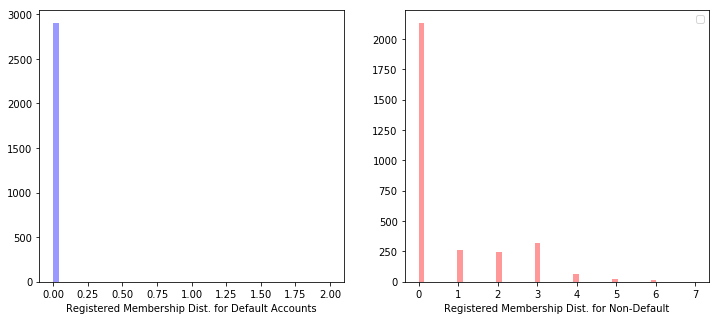

In [644]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0] = sns.distplot(unique[unique['default_name_cat']==1]['user.mbrank'], kde=False, ax=axes[0], color='b', axlabel = 'Registered Membership Dist. for Default Accounts')
axes[1] = sns.distplot(unique[unique['default_name_cat']==0]['user.mbrank'], kde=False, ax=axes[1], color='r', axlabel = 'Registered Membership Dist. for Non-Default')
plt.legend()

In [645]:
unique[unique['default_name_cat']==1]['user.mbrank'].value_counts()

0    2902
2       3
1       1
Name: user.mbrank, dtype: int64

In [646]:
unique[unique['default_name_cat']==0]['user.mbrank'].value_counts()

0    2132
3     322
1     258
2     249
4      63
5      27
6      13
7       2
Name: user.mbrank, dtype: int64

In [647]:
digit['user.mbrank'].value_counts()/digit.shape[0]

0    0.967491
3    0.011392
2    0.011392
1    0.008614
5    0.000556
4    0.000556
Name: user.mbrank, dtype: float64

In [648]:
digit.groupby('user.mbrank')['user.followers_count'].describe()

,count,mean,std,min,25%,50%,75%,max
user.mbrank,,,,,,,,
0,3482.0,7.351522,90.302148,0.0,1.00,1.0,1.00,4225.0
1,31.0,112.645161,100.014848,8.0,48.50,69.0,150.50,378.0
2,41.0,156.829268,279.062798,9.0,52.00,80.0,163.00,1701.0
3,41.0,622.439024,1874.330988,3.0,84.00,159.0,296.00,11470.0
4,2.0,549.500000,429.213816,246.0,397.75,549.5,701.25,853.0
5,2.0,504.000000,519.016377,137.0,320.50,504.0,687.50,871.0


In [649]:
digit[(digit['user.mbrank'] == 0) & (digit['user.followers_count'] <= 1 )].describe()

,attitudes_count,comments_count,id,reposts_count,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,user.badge.cz_wed_2017,user.badge.dailv,user.badge.dailv_2018,...,user.followers_count,user.gender,user.mbrank,user.mbtype,user.statuses_count,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat
count,2776.0,2776.0,2.776000e+03,2776.0,2776.0,2776.0,2776.0,2776.0,2776.0,2776.00000,...,2776.00000,2776.000000,2776.0,2776.0,2776.000000,2776.000000,2776.0,2776.000000,2776.000000,2776.000000
mean,0.0,0.0,4.356101e+15,0.0,0.0,0.0,0.0,0.0,0.0,0.00036,...,0.99964,0.507565,0.0,0.0,28.735591,1.002522,0.0,0.873199,1.157061,0.914625
std,0.0,0.0,1.078179e+13,0.0,0.0,0.0,0.0,0.0,0.0,0.01898,...,0.01898,0.500033,0.0,0.0,38.130699,1.266190,0.0,0.332810,1.026412,0.279489
min,0.0,0.0,4.309068e+15,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.00000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,0.0,0.0,4.358057e+15,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,1.00000,0.000000,0.0,0.0,22.000000,0.000000,0.0,1.000000,1.000000,1.000000
50%,0.0,0.0,4.358530e+15,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,1.00000,1.000000,0.0,0.0,25.000000,0.000000,0.0,1.000000,1.000000,1.000000
75%,0.0,0.0,4.358927e+15,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,1.00000,1.000000,0.0,0.0,27.000000,2.000000,0.0,1.000000,1.000000,1.000000
max,0.0,0.0,4.360564e+15,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,...,1.00000,1.000000,0.0,0.0,710.000000,4.000000,0.0,1.000000,17.000000,1.000000


In [650]:
unique.loc[unique['user.mbrank']==0, 'vip_cat'] = 0
unique.loc[unique['user.mbrank']>0, 'vip_cat'] = 1
unique['vip_cat'].value_counts()

0.0    5034
1.0     938
Name: vip_cat, dtype: int64

In [651]:
unique.loc[unique['user.followers_count']<=1, 'followers_cat'] = 1
unique.loc[unique['user.followers_count']>1, 'followers_cat'] = 0
unique['followers_cat'].value_counts()

1.0    3240
0.0    2732
Name: followers_cat, dtype: int64

In [652]:
unique.groupby('default_name_cat')['reposts_count'].mean()

default_name_cat
0.0    0.682975
1.0    0.000000
Name: reposts_count, dtype: float64

In [653]:
unique[unique['default_name_cat']==1]['reposts_count'].value_counts()

0    2906
Name: reposts_count, dtype: int64

**It seems that default name accounts often get no reposts, while non-default ones are more likely to get reposted.**

### mbtype - 12都是个人账户，0也是。2有个人账户也有企业账户，11也是企业账户

In [654]:
unique['user.mbtype'].value_counts()

0     5034
12     332
2      322
11     274
13      10
Name: user.mbtype, dtype: int64

In [655]:
unique[unique['default_name_cat']==1]['user.mbtype'].value_counts()

0     2902
11       2
2        2
Name: user.mbtype, dtype: int64

In [656]:
unique[unique['default_name_cat']==0]['user.mbtype'].value_counts()

0     2132
12     332
2      320
11     272
13      10
Name: user.mbtype, dtype: int64

In [657]:
unique[(unique['default_name_cat']==0) & (unique['user.mbtype'] == 13)]

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat
178,MMM_meatball,0,0,4357383175589822,大家多发点//@肥仔欢乐水 : http://t.cn/EiE5GFx //@上鳴涼玖 : ...,0,Weibo.intl,0.0,0.0,1.0,...,46,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0
581,世中仙儿x,0,0,4359643591685035,转发微博,0,vivo智能手机,0.0,0.0,1.0,...,18,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
1054,坤哥的小mi姐,0,0,4359117725896757,坤哥，早上好[心],0,iPhone 6,0.0,0.0,1.0,...,26,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
5304,筋肉普利尼,0,0,4357405204844393,哈哈哈哈哈//@TS特摄英雄部: http://t.cn/EiQC4Uo //@黑洞开关W...,0,搜狗高速浏览器,0.0,1.0,0.0,...,48,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0
5456,芒果冰味的坤坤鸭,0,0,4359620565046568,转发微博,0,三星Galaxy S9,0.0,0.0,0.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
5656,装狮子的猫kun,0,0,4358725533497751,转发微博,0,vivoX23全息幻彩,0.0,0.0,1.0,...,21,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
5709,超酷甜头,0,0,4358588124095050,转发微博,0,vivo智能手机客户端,0.0,0.0,1.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
5717,辉人的微风,0,0,4319514407258681,不同的形象，一样的你，爱你@罗云熙Leo 的每一面。快来为TA应援吧 //@罗云熙Leo:...,0,明星ALL榜,0.0,0.0,1.0,...,47,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0
5799,铁头如花不怕捶,0,0,4309904280427719,//@罗云熙Leo:尊重是一切最基本的遵循,0,OPPO超视野全面屏R15,0.0,0.0,1.0,...,27,1,1,2,0.0,0.0,0.0,0.0,1.0,0.0
5916,风吹过的夏季_,0,0,4309886760684111,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,...,18,1,1,2,0.0,0.0,0.0,1.0,1.0,0.0


In [658]:
unique[(unique['default_name_cat']==0) & (unique['user.mbtype'] == 12)].sample(5)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat
2274,璇玑宫小宫女,0,0,4312019874680784,//@罗云熙Leo:尊重是一切最基本的遵循,0,HUAWEI P20 Pro,0.0,0.0,1.0,...,15,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0
132,KT猫Yukee,0,0,4309797668575931,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,...,31,1,1,3,0.0,0.0,0.0,0.0,1.0,0.0
1798,星期一的花椰菜,0,0,4309543242646024,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,0.0,...,14,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0
1210,孤今日丹青,0,0,4311567036138363,言承三生诺不更，为TA@罗云熙Leo 打榜不能停 。快来为TA应援吧 //@罗云熙Leo:...,0,明星ALL榜,0.0,0.0,0.0,...,9,0,1,4,0.0,0.0,0.0,0.0,1.0,0.0
5303,等等110908,0,0,4311297761953657,[good][good][good]//@罗云熙Leo:尊重是一切最基本的遵循,0,iPhone客户端,0.0,0.0,1.0,...,19,0,0,4,0.0,1.0,0.0,0.0,1.0,0.0


In [659]:
unique[unique['default_name_cat']==1]['raw_text'].value_counts().nlargest(10)

转发微博                                          753
轉發微博                                          224
//@罗云熙Leo:尊重是一切最基本的遵循                          28
做你想做的，趁阳光正好，去追逐梦想，趁还年轻。生活从不亏待每一个努力向上的人@蔡徐坤     24
再见                                             24
转发                                             22
离别是为了更好的相遇                                     20
挑惹起戰爭 賜予世界更豐富愛恨 ​​​蔡徐坤@蔡徐坤                     19
再见啦可爱的千千                                       18
再见千千                                           18
Name: raw_text, dtype: int64

In [660]:
unique[unique['default_name_cat']==0]['raw_text'].value_counts().nlargest(10)

转发微博                                                       538
//@罗云熙Leo:尊重是一切最基本的遵循                                      422
@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重是一切最基本的遵循    237
#蔡徐坤 ONE# ｜#蔡徐坤的未完成#  越努力，越幸运；越自律，越优秀。@蔡徐坤                  94
再见                                                          42
//@罗云熙Leo: 尊重是一切最基本的遵循                                      30
#蔡徐坤 ONE# #Bigger-蔡徐坤[音乐]# [抱抱]                             20
轉發微博                                                        19
尊重是一切最基本的遵循//@罗云熙Leo:尊重是一切最基本的遵循                            14
拜拜                                                          13
Name: raw_text, dtype: int64

In [661]:
raw_text_default = unique[(unique['raw_text']=='转发微博') | 
       (unique['raw_text']=='轉發微博') | 
       (unique['raw_text']=='转发')]
raw_text_default.shape[0]

1565

In [662]:
raw_text_default

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat
1,-你左边脸上的那颗幸运痣,0,0,4357854192189666,转发微博,0,vivo X23 AI非凡摄影,0.0,0.0,0.0,...,27,0,0,1,0.0,0.0,0.0,1.0,1.0,0.0
9,1515898332WFwiC,0,0,4360002254587124,转发微博,0,vivo AI智慧拍照X21,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
12,1冉冉冉冉冉冉,0,1,4359625610056308,转发微博,0,vivo智能手机,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
13,1宣儿,0,0,4358551465991022,转发微博,0,小米8 SE,0.0,0.0,0.0,...,1,0,1,1,0.0,0.0,0.0,0.0,0.0,1.0
14,200斤200斤,0,0,4359246922933337,转发微博,0,OPPO智能手机,0.0,0.0,0.0,...,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
15,200斤的坤哥呀,0,0,4359245111451031,转发微博,0,OPPO智能手机,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
17,2019与坤同行,0,0,4359310013936692,转发微博,0,小葵专属的iPhone 8 Plus（银色）,0.0,0.0,0.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
29,802号葵葵糖果屋,0,0,4358554699193684,转发微博,0,红米Redmi,0.0,0.0,1.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
32,890802kun,0,0,4358025206749805,转发微博,0,荣耀畅玩7 全面屏手机,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
34,AA-AK,0,0,4358871180938072,轉發微博,0,iPhone客户端,0.0,0.0,0.0,...,2,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0


In [663]:
raw_text_default['verified_cat'].value_counts()

0    1555
1      10
Name: verified_cat, dtype: int64

In [664]:
unique[~(unique['raw_text']=='转发微博')&
       ~(unique['raw_text']=='轉發微博')&
       ~(unique['raw_text']=='转发')]['verified_cat'].value_counts()
# raw_text_default.shape[0]

0    4231
1     176
Name: verified_cat, dtype: int64

### Adds a binary column for identifying default repost text

In [665]:
unique.loc[unique['raw_text'].str.contains('(转发微博|轉發微博|转发)', regex=True), 'default_cont_cat'] = 1
unique.loc[~unique['raw_text'].str.contains('(转发微博|轉發微博|转发)', regex=True), 'default_cont_cat'] = 0
unique['default_cont_cat'].value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0.0    4397
1.0    1575
Name: default_cont_cat, dtype: int64

In [666]:
raw_text_default['user.description'].isnull().sum()/raw_text_default.shape[0]

0.9092651757188498

**About 90% of accounts who reposted with default text have NaN sources.**

In [667]:
valid_descp_mean = raw_text_default[~raw_text_default['user.description'].isnull()]['user.followers_count'].mean() 
valid_descp_mean

137.57042253521126

In [668]:
nan_descp_mean = raw_text_default[raw_text_default['user.description'].isnull()]['user.followers_count'].mean() 
nan_descp_mean

6.737174982431482

In [669]:
raw_text_default[(raw_text_default['user.description'].isnull()) &
                (raw_text_default['user.followers_count'] < nan_descp_mean)].sample(10)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat
3851,用户6799402767,0,0,4358202835571783,转发微博,0,vivo AI智慧拍照X21,0.0,0.0,0.0,...,3,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0
2721,用户6777599169,0,0,4358936528761053,转发微博,0,vivo AI智慧拍照X21,0.0,0.0,0.0,...,1,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0
5658,要-努力再努力,0,0,4358380807784208,转发微博,0,vivo X23全息幻彩,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,1.0,0.0,1.0
3798,用户6798570531,0,0,4358164763604143,转发微博,0,前后2000万 OPPO R11s,0.0,0.0,0.0,...,2,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0
3723,用户6798281165,0,0,4360015038786418,转发微博,0,小米6X 拍人更美,0.0,0.0,0.0,...,1,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0
4059,用户6800084325,0,0,4358540417843471,转发微博,0,OPPO智能手机,0.0,0.0,0.0,...,2,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0
4278,用户6801037413,0,0,4358811375097947,转发微博,0,前置双摄vivo X9s,0.0,0.0,0.0,...,0,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0
3536,用户6797209172,0,0,4357861540473989,轉發微博,0,vivo X23 AI非凡摄影,0.0,0.0,0.0,...,1,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0
4299,用户6801065657,0,0,4357746947881832,转发微博,0,荣耀7A 全屏 人脸识别,0.0,0.0,0.0,...,2,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0
3799,用户6798578278,0,0,4357801272920484,转发微博,0,vivo X23全息幻彩,0.0,0.0,0.0,...,2,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0


In [670]:
raw_text_default[~(raw_text_default['user.description'].isnull()) &
                (raw_text_default['user.followers_count'] < valid_descp_mean)].sample(10)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat
75,BlueInk,0,0,4357253660926016,转发微博,0,OPPO R15x,0.0,0.0,1.0,...,4,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
498,一只沐沐i,0,0,4360235102192064,转发微博,0,vivo X23 AI非凡摄影,0.0,0.0,1.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
564,不忘初心yilutongxing,0,0,4359904347315906,转发微博,0,华为手机 畅享玩不停,0.0,0.0,0.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
225,Shirley_0919,0,0,4358825370272640,转发微博,0,HUAWEI P20,0.0,0.0,0.0,...,9,0,0,1,0.0,1.0,0.0,1.0,1.0,0.0
55,Arazy1,0,0,4358123462425783,转发微博,0,前后2000万 OPPO R11,0.0,0.0,1.0,...,20,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0
1797,星塵蜜语说给小困听,0,0,4357741587927447,转发微博,0,前置双摄vivo X9sPlus,0.0,0.0,0.0,...,9,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
1645,我坤哥历害,0,0,4359982138691116,转发微博,0,iPhone客户端,0.0,0.0,1.0,...,11,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
1809,是坤哥的张张呀,0,0,4357855425157030,转发微博,0,iPhone X,0.0,0.0,1.0,...,6,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
484,·狙击月亮·,0,0,4357862270463499,转发微博,0,OPPO智能手机,0.0,0.0,1.0,...,9,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
5960,麻麻的葵宝贝,0,0,4359984550805512,转发微博,0,iPhone客户端,0.0,0.0,0.0,...,9,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [671]:
raw_text_default[~(raw_text_default['user.description'].isnull()) &
                (raw_text_default['user.followers_count'] < nan_descp_mean)].sample(10)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,user.urank,verified_cat,default_img_cat,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat
2319,用户6660245729,0,0,4358080793185068,转发微博,0,OPPO智能手机,0.0,0.0,0.0,...,4,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0
335,ikunday,0,0,4359083547227131,转发微博,0,vivo X23 AI非凡摄影,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1159,奎妈来蹦迪,0,0,4358740986036636,转发微博,0,iPhone客户端,0.0,0.0,0.0,...,3,0,1,1,0.0,0.0,0.0,0.0,0.0,1.0
530,一颗菜桃,0,0,4357838094935033,转发微博,0,HUAWEI P20 Pro,0.0,0.0,0.0,...,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
572,不知山月歌,0,0,4358063559340096,转发微博,0,HUAWEI Mate 10,0.0,0.0,0.0,...,4,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0
2140,焦头烂额的TOMO酱,0,0,4359981052249477,转发微博,0,vivo X23全息幻彩,1.0,0.0,1.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
575,不需要男友28799,0,0,4359282797881916,转发微博,0,OPPO智能手机,0.0,0.0,0.0,...,4,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0
1861,最爱kun啊,0,0,4358835097341356,转发微博,0,iPhone客户端,0.0,0.0,0.0,...,9,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
32,890802kun,0,0,4358025206749805,转发微博,0,荣耀畅玩7 全面屏手机,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1245,宠着蔡小葵鸭,0,0,4358856387261672,转发微博,0,OPPO智能手机,0.0,0.0,0.0,...,4,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


**We filtered out a set of users based on the conditions:**
1. user.description == NaN and;
2. followers_count < 6.73

**Surprisingly, as I took a skim look at the dataframe, there are many rows using the default screen names as I previously identified.**
For better understanding, I pulled out two other dataframes to compare (listed as above):
1. Non-null user description and followers_count < 6.73 (mean of followers_count for NaN user.description);
2. Non-null user description and followers_count < 136.88 (mean of followers_count for non-NaN user.description);

### Adds a new binary column for identifying null profile description

In [672]:
unique.loc[unique['user.description'].isnull(), 'intro_cat'] = 0
unique.loc[~unique['user.description'].isnull(), 'intro_cat'] = 1
unique['intro_cat'].value_counts()

0.0    4745
1.0    1227
Name: intro_cat, dtype: int64

In [673]:
unique['source'].value_counts()

iPhone客户端                   1148
vivo X23全息幻彩                 395
vivo X23 AI非凡摄影              296
明星势力榜                        277
vivo智能手机                     244
明星ALL榜                       221
OPPO智能手机                     202
Android                      196
Weibo.intl                   174
Android客户端                   103
小米5s 拍照黑科技                   101
三星GALAXY A                    97
OPPO超视野全面屏R15                 93
前后2000万 OPPO R11              85
vivo AI智慧拍照X21                81
OPPO R9s                      72
前置双摄vivo X9                   71
荣耀V10 我AI的快                   61
小米6X 拍人更美                     58
小米5X 拍人更美                     57
vivo X20全面屏手机                 55
UC浏览器                         54
HUAWEI nova 3e                53
HUAWEI P20 Pro                50
前置双摄vivo X9s                  49
OPPO R9 Plus                  48
小米MIX2S 全面屏                   45
红米Redmi                       44
vivo Y81系列                    38
够快才畅快vivo X6S                 35
          

In [674]:
non_unique_source = list(unique.groupby('source').filter(lambda x: len(x) >= 2)['source'].drop_duplicates())
non_unique_source

['vivo X23 AI非凡摄影',
 '明星ALL榜',
 'iPhone客户端',
 '荣耀手机 勇敢做自己',
 'iPhone',
 'Android',
 '明星势力榜',
 'vivo AI智慧拍照X21',
 '小米8青春版 潮流旗舰',
 'vivo智能手机',
 '小米8 SE',
 'OPPO智能手机',
 'HUAWEI Mate 20 Pro',
 'iPhone 6s Plus',
 '红米Redmi',
 '三星android智能手机',
 '微博极速版',
 '小米5s 拍照黑科技',
 '微博 HTML5 版',
 'iPhone 8 Plus',
 '前后2000万 OPPO R11',
 '红米Note 5 AI双摄',
 '前置双摄vivo X9',
 'vivo X23全息幻彩',
 'OPPO随光而变R17',
 '疾速双摄 魅蓝 Note6',
 '华为手机 畅享玩不停',
 'OPPO R15x',
 'OPPO R7s',
 '前后2000万 OPPO R11s',
 '荣耀7X 全面屏手机',
 '小米手机5',
 'OPPO R15 梦镜版',
 '荣耀V10 我AI的快',
 'iPhone 6 Plus',
 '前置双摄vivo X9sPlus',
 '荣耀8青春版 颜值担当',
 '小米Max2 大屏大电量',
 'ZTE中兴智能手机',
 'iPhone X',
 '荣耀7C 人脸识别双摄',
 '告别不快vivo V3Max',
 'vivo NEX AI智慧旗舰',
 '微博 weibo.com',
 '蔡徐坤的Android',
 'HUAWEI nova 3i',
 '360安全浏览器',
 '小米6X 拍人更美',
 'UC浏览器',
 '三星 Galaxy S7 Edge',
 '小米5X 拍人更美',
 '华为麦芒5',
 'OPPO超视野全面屏R15',
 'OPPO R9s',
 '华为P9手机摄影再突破',
 'Weibo.intl',
 'Android客户端',
 '窗 - 魅族 PRO 7',
 'iPhone 6s',
 '荣耀8X',
 'HUAWEI P20',
 'HUAWEI nova 3',
 'iPhone 7 Plus',
 'vivo X20全面屏手机',
 '

**Can use the list (non_unique_source) as a filter.**

In [715]:
print(len(non_unique_source))
unique.loc[unique['source'].str.contains('|'.join(non_unique_source),na = False), 'device_cat'] = 0
unique.loc[~unique['source'].str.contains('|'.join(non_unique_source),na = False), 'device_cat'] = 1
unique['device_cat'].value_counts()

162


0.0    5907
1.0      65
Name: device_cat, dtype: int64

In [676]:
# print('contains 榜')
# print (unique['source'].str.contains('榜').value_counts()/unique.shape[0])
unique[unique['user.description'].str.contains('数据')==True]["source"].value_counts()

明星势力榜             5
vivo X23全息幻彩      2
微博 HTML5 版        2
明星ALL榜            2
HUAWEI Mate 10    2
iPhone客户端         2
iPhone 6s         1
Name: source, dtype: int64

In [677]:
unique[unique['user.screen_name'].str.contains('数据')==True]["source"].value_counts()

HUAWEI nova 2 Plus    1
明星ALL榜                1
Name: source, dtype: int64

In [678]:
print('contains 榜')
print (unique['source'].str.contains('榜').value_counts()/unique.shape[0])
unique[unique['source'].str.contains('榜')==True]["source"].value_counts()

contains 榜
False    0.913094
True     0.083389
Name: source, dtype: float64


明星势力榜     277
明星ALL榜    221
Name: source, dtype: int64

In [679]:
unique[unique['source']=='明星势力榜'].sample(10)

,user.screen_name,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,...,multiple_share,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat,default_cont_cat,intro_cat,device_cat
926,吃饭不挑,0,0,4309838416721950,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2087,淡定啊佐边,0,0,4309081806359839,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5914,风华绝代哥哥的世界,0,0,4309941857109874,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2307,用户6533316532,0,0,4309417375817464,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,...,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5789,金泥尔,0,0,4309563421588221,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
473,yunxi2,0,0,4309545558344467,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
490,一二三四扭腰,0,0,4309080506103168,//@罗云熙Leo: 尊重是一切最基本的遵循,0,明星势力榜,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5400,罗小炮的清梦Libra,0,0,4309863184527383,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
148,L6的贴心小棉袄,0,0,4309839179926385,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5415,美尔灼灼,0,0,4309476905521020,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [680]:
unique[unique['source']=='明星势力榜'].isna().sum()

user.screen_name                       0
attitudes_count                        0
comments_count                         0
id                                     0
raw_text                               0
reposts_count                          0
source                                 0
user.badge.anniversary                 0
user.badge.asiad_2018                  0
user.badge.bind_taobao                 0
user.badge.cz_wed_2017                 0
user.badge.dailv                       0
user.badge.dailv_2018                  0
user.badge.denglong_2019               0
user.badge.double11_2018               0
user.badge.dzwbqlx_2016                0
user.badge.follow_whitelist_video      0
user.badge.fu_2019                     0
user.badge.gongyi                      0
user.badge.gongyi_level                0
user.badge.hongbaofei_2019             0
user.badge.kpl_2018                    0
user.badge.league_badge                0
user.badge.lol_gm_2017                 0
user.badge.lol_m

In [681]:
# unique[unique['source']!='明星势力榜'].isna().sum()

In [682]:
# dropped['source'].str.contains('明星势力榜').value_counts()

In [683]:
unique.groupby('user.gender').default_name_cat.mean()

user.gender
0    0.407577
1    0.597267
Name: default_name_cat, dtype: float64

In [684]:
unique['reposts_count'].value_counts()

0       5966
1          3
6          1
1353       1
732        1
Name: reposts_count, dtype: int64

In [685]:
unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 1 to 5972
Data columns (total 68 columns):
user.screen_name                     5972 non-null object
attitudes_count                      5972 non-null int64
comments_count                       5972 non-null int64
id                                   5972 non-null int64
raw_text                             5972 non-null object
reposts_count                        5972 non-null int64
source                               5951 non-null object
user.badge.anniversary               5972 non-null float64
user.badge.asiad_2018                5972 non-null float64
user.badge.bind_taobao               5972 non-null float64
user.badge.cz_wed_2017               5972 non-null float64
user.badge.dailv                     5972 non-null float64
user.badge.dailv_2018                5972 non-null float64
user.badge.denglong_2019             5972 non-null float64
user.badge.double11_2018             5972 non-null float64
user.badge.dzwbqlx_

In [686]:
unique.rename(columns={'user.statuses_count':'posts_num',
                       'user.followers_count':'followers_num',
                       'user.follow_count':'followings_num',
                       'user.gender':'gender'},inplace=True)

In [753]:
unique.columns

Index(['user.screen_name', 'attitudes_count', 'comments_count', 'id',
       'raw_text', 'reposts_count', 'source', 'user.badge.anniversary',
       'user.badge.asiad_2018', 'user.badge.bind_taobao',
       'user.badge.cz_wed_2017', 'user.badge.dailv', 'user.badge.dailv_2018',
       'user.badge.denglong_2019', 'user.badge.double11_2018',
       'user.badge.dzwbqlx_2016', 'user.badge.follow_whitelist_video',
       'user.badge.fu_2019', 'user.badge.gongyi', 'user.badge.gongyi_level',
       'user.badge.hongbaofei_2019', 'user.badge.kpl_2018',
       'user.badge.league_badge', 'user.badge.lol_gm_2017',
       'user.badge.lol_msi_2017', 'user.badge.lol_s8',
       'user.badge.meilizhongguo_2018', 'user.badge.memorial_2018',
       'user.badge.national_day_2018', 'user.badge.panda',
       'user.badge.qixi_2018', 'user.badge.status_visible',
       'user.badge.suishoupai_2018', 'user.badge.super_star_2017',
       'user.badge.super_star_2018', 'user.badge.travel_2017',
       'user.badge.

In [754]:
fake = dropped.copy()
fake.head(5)

,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,user.badge.cz_wed_2017,...,user.follow_count,user.followers_count,user.gender,user.mbrank,user.mbtype,user.screen_name,user.statuses_count,user.urank,verified_cat,default_img_cat
0,0,0,4327742222747234,//@罗云熙Leo:尊重是一切最基本的遵循,0,OPPO R15 梦镜版,0.0,0.0,1.0,0.0,...,57,29,0,3,11,Ella哇哦呜哇哦呜,124,4,0,0
1,0,0,4324519222687127,说得真好，明白@罗云熙Leo//@罗云熙Leo:尊重是一切最基本的遵循,0,HUAWEI Mate 9,0.0,0.0,0.0,0.0,...,556,246,0,4,12,宫汝雪1314,3634,22,0,0
2,0,0,4324171619849135,//@罗云熙Leo: 尊重是一切最基本的遵循,0,微博 weibo.com,0.0,0.0,0.0,0.0,...,33,30,1,0,0,南宫沐彦,168,6,0,0
3,0,0,4323656345349198,//@罗云熙Leo:尊重是一切最基本的遵循,0,荣耀手机 勇敢做自己,0.0,0.0,0.0,0.0,...,1998,284,0,0,0,季流夏,6106,4,0,0
4,0,0,4323336907448716,//@罗云熙Leo:尊重是一切最基本的遵循,0,联想Z5 · 新国民旗舰,0.0,0.0,0.0,0.0,...,249,150,0,0,0,对陈先生心动1121次,549,18,0,0


In [755]:
# fake['user.screen_name'].value_counts()

In [756]:
fake['user.badge.wbzy_2018'].value_counts()

0.0    5310
1.0    3687
Name: user.badge.wbzy_2018, dtype: int64

### Use badge as a non-feature criteria to verify account

In [757]:
badge_true_index = fake[(fake['user.badge.anniversary']==1)|
                    (fake['user.badge.asiad_2018']==1)|
                    (fake['user.badge.bind_taobao']==1)|
                    (fake['user.badge.cz_wed_2017']==1)|
                    (fake['user.badge.denglong_2019']==1)|
                    (fake['user.badge.double11_2018']==1)|
                    (fake['user.badge.dzwbqlx_2016']==1)|
                    (fake['user.badge.follow_whitelist_video']==1)|
                    (fake['user.badge.fu_2019']==1)|
                    (fake['user.badge.gongyi']==1)|
                    (fake['user.badge.gongyi_level']==1)|
                    (fake['user.badge.hongbaofei_2019']==1)|
                    (fake['user.badge.kpl_2018']==1)|
                    (fake['user.badge.league_badge']==1)| 
                    (fake['user.badge.lol_gm_2017']==1)|
                    (fake['user.badge.lol_msi_2017']==1)|
                    (fake['user.badge.lol_s8']==1)|
                    (fake['user.badge.meilizhongguo_2018']==1)|
                    (fake['user.badge.memorial_2018']==1)|
                    (fake['user.badge.national_day_2018']==1)|
                    (fake['user.badge.panda']==1)|
                    (fake['user.badge.qixi_2018']==1)|
                    (fake['user.badge.status_visible']==1)|
                    (fake['user.badge.suishoupai_2018']==1)|
                    (fake['user.badge.super_star_2017']==1)|
                    (fake['user.badge.super_star_2018']==1)|
                    (fake['user.badge.travel_2017']==1)|
                    (fake['user.badge.uefa_euro_2016']==1)|
                    (fake['user.badge.vip_activity2']==1)|
                    (fake['user.badge.wbzy_2018']==1)|
                    (fake['user.badge.wenchuan_10th']==1)|
                    (fake['user.badge.womensday_2018']==1)|
                    (fake['user.badge.worldcup_2018']==1)|
                    (fake['user.badge.yiqijuan_2018']==1)|
                    (fake['user.badge.zongyiji']==1)].index

In [758]:
badge_true_index.shape[0]

4323

In [759]:
fake.loc[fake['user.screen_name'].str.contains('用户'), 'default_name_cat'] = 1
fake.loc[~fake['user.screen_name'].str.contains('用户'), 'default_name_cat'] = 0

fake.loc[fake['user.screen_name'].str.contains(r'\d+$', na=False), 'garbled_name_cat'] = 1
fake.loc[~fake['user.screen_name'].str.contains(r'\d+$', na=False), 'garbled_name_cat'] = 0

fake.loc[fake['user.screen_name'].str.contains('|'.join(charlist)), 'ch_name_cat'] = 1
fake.loc[~fake['user.screen_name'].str.contains('|'.join(charlist)), 'ch_name_cat'] = 0

fake.loc[fake['user.screen_name'].map(lambda v: any(char in v for char in string.punctuation)), 'en_name_cat'] = 1
fake.loc[~fake['user.screen_name'].map(lambda v: any(char in v for char in string.punctuation)), 'en_name_cat'] = 0

fake.loc[fake['user.mbrank']==0, 'vip_cat'] = 0
fake.loc[fake['user.mbrank']>0, 'vip_cat'] = 1

fake.loc[fake['user.followers_count']<=1, 'followers_cat'] = 1
fake.loc[fake['user.followers_count']>1, 'followers_cat'] = 0

fake.loc[fake['raw_text'].str.contains('(转发微博|轉發微博|转发)', regex=True), 'default_cont_cat'] = 1
fake.loc[~fake['raw_text'].str.contains('(转发微博|轉發微博|转发)', regex=True), 'default_cont_cat'] = 0

fake.loc[fake['user.description'].isnull(), 'intro_cat'] = 0
fake.loc[~fake['user.description'].isnull(), 'intro_cat'] = 1

fake['device_cat']=1
fake.loc[fake['source'].str.contains('|'.join(non_unique_source),na = False), 'device_cat'] = 0
# fake.loc[~fake['source'].str.contains('|'.join(non_unique_source),na = False), 'device_cat'] = 1


fake.rename(columns={'user.statuses_count':'posts_num',
                     'user.mbrank':'vip_num',
                       'user.followers_count':'followers_num',
                       'user.follow_count':'followings_num',
                       'user.gender':'gender'},inplace=True)

fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8997 entries, 0 to 4781
Data columns (total 67 columns):
attitudes_count                      8997 non-null int64
comments_count                       8997 non-null int64
id                                   8997 non-null int64
raw_text                             8997 non-null object
reposts_count                        8997 non-null int64
source                               8970 non-null object
user.badge.anniversary               8997 non-null float64
user.badge.asiad_2018                8997 non-null float64
user.badge.bind_taobao               8997 non-null float64
user.badge.cz_wed_2017               8997 non-null float64
user.badge.dailv                     8997 non-null float64
user.badge.dailv_2018                8997 non-null float64
user.badge.denglong_2019             8997 non-null float64
user.badge.double11_2018             8997 non-null float64
user.badge.dzwbqlx_2016              8997 non-null float64
user.badge.follow_

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [760]:
obj_list = list(fake.select_dtypes(include=['object']).columns)
obj_list

['raw_text', 'source', 'user.description', 'user.screen_name']

In [761]:
fake.drop(columns = obj_list, inplace=True)
fake.sample(5)

,attitudes_count,comments_count,id,reposts_count,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,user.badge.cz_wed_2017,user.badge.dailv,user.badge.dailv_2018,...,default_img_cat,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat,default_cont_cat,intro_cat,device_cat
4720,0,0,4310892474446057,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
941,0,0,4311008836978677,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3706,0,0,4358210590610125,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
855,0,0,4358167502711924,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2455,0,0,4309691288581760,0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [762]:
fake.isna().sum().any()

False

In [763]:
user_name_fake_ind = fake[((fake['default_name_cat']==1)|
                     (fake['garbled_name_cat']==1)|
                     (fake['ch_name_cat']==1)|
                     (fake['en_name_cat']==1))&
                     (fake['vip_cat'] == 0)&
                     (fake['reposts_count'] == 0)].index
len(user_name_fake_ind)

4978

In [764]:
non_def_fake_ind = fake[((fake['default_name_cat']==1)|
                         (fake['garbled_name_cat']==1)|
                         (fake['ch_name_cat']==1)|
                         (fake['en_name_cat']==1))&
                        (fake['default_cont_cat']== 1)].index
len(non_def_fake_ind)

1351

In [765]:
# fake['vip_num'].value_counts()
vip_true_ind = fake[(fake['vip_num']>=2)].index

In [766]:
unique_source_true_ind = fake[(fake['device_cat']==1)].index

In [767]:
tru_ind= list(set(vip_true_ind) | set(unique_source_true_ind) | set(unique_img_url_index))
len(tru_ind)

3329

In [768]:
fak_ind = list(set(user_name_fake_ind) | set(non_def_fake_ind))
len(fak_ind)

4110

In [769]:
fakfak_ind = set(fak_ind) - set(tru_ind)
len(fakfak_ind)

1386

In [770]:
fake.head(5)

,attitudes_count,comments_count,id,reposts_count,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,user.badge.cz_wed_2017,user.badge.dailv,user.badge.dailv_2018,...,default_img_cat,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat,default_cont_cat,intro_cat,device_cat
0,0,0,4327742222747234,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0,0,4324519222687127,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0,0,4324171619849135,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0,0,4323656345349198,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,4323336907448716,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [771]:
dropped.iloc[list(fakfak_ind)].sample(10)

,attitudes_count,comments_count,id,raw_text,reposts_count,source,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,user.badge.cz_wed_2017,...,user.follow_count,user.followers_count,user.gender,user.mbrank,user.mbtype,user.screen_name,user.statuses_count,user.urank,verified_cat,default_img_cat
4187,1,0,4309070918298441,共青团说的对，没想到罗云熙三观这么正，经常传播正能量，@罗云熙Leo //@罗云熙Leo:尊...,0,iPhone客户端,0.0,0.0,0.0,0.0,...,103,105,0,0,0,云熙熙熙熙熙熙,462,22,0,1
224,0,0,4359660318326626,转发微博,0,iPhone客户端,0.0,0.0,0.0,0.0,...,62,2,1,0,0,滔天__巨浪的风,29,4,0,0
1822,0,0,4309973540342113,尊重中国，尊重中华文化。筷子所代表的不仅代表了中国人“天圆地方”的世界观，更代表了中国源远流...,0,iPhone客户端,0.0,0.0,0.0,0.0,...,86,4,0,0,0,哈迷·龙蛋·螺狮粉·blue,9,4,0,1
3991,0,0,4309078790200148,请尊重中国，尊重中国人民,0,Android,0.0,0.0,0.0,0.0,...,1,1,1,0,0,用户6841869370,25,1,0,1
1326,0,0,4310597795500772,[米奇比心][米奇比心][米奇比心]//@罗云熙Leo:尊重是一切最基本的遵循,0,iPhone客户端,0.0,0.0,0.0,0.0,...,53,27,0,1,2,小娉果的小马甲,1282,9,0,1
332,0,0,4360036757586904,转发微博,0,小米8 SE,0.0,0.0,0.0,0.0,...,63,1,0,0,0,用户6774713652,49,2,0,1
2602,0,0,4309666730996769,[憧憬]//@罗云熙数据组:一切努力奋斗，都是为了捍卫🇨🇳的尊严//@罗云熙Leo:尊重是一...,0,Android,0.0,0.0,0.0,0.0,...,60,1,0,0,0,柳下皓轩0353,50,4,0,1
2742,0,0,4309653880039872,赞[可爱][可爱][可爱]●▂●●▂●//@罗云熙Leo:尊重是一切最基本的遵循,0,UC浏览器,0.0,0.0,0.0,0.0,...,33,3,0,0,0,唯爱我熙8808,165,4,0,1
3412,0,0,4309436267194534,@罗云熙Leo 我永远支持你！我们一起拿下 #明星势力榜# 第一名！//@罗云熙Leo:尊重...,0,明星势力榜,0.0,0.0,1.0,0.0,...,1222,372,1,0,0,楠木青177,2124,30,0,1
3767,0,0,4309087405941686,切莫自取其辱,0,Android,0.0,0.0,0.0,0.0,...,1,1,1,0,0,用户6840733338,25,2,0,1


In [772]:
fake['Effective'] = 1
fake.loc[fakfak_ind, 'Effective'] = 0

In [779]:
# fake.info()
# fake.isna().sum().any()

In [780]:
fake.sample(frac=1)
fake.to_csv('all_in_1_w_more_feat.csv')

In [ ]:
# out = fake[['id', 
#                'posts_num', 
#                'followers_num', 
#                'followings_num', 
#                'vip_num', 
#                'gender', 
#                'default_name_cat', 
#                'garbled_name_cat', 
#                'en_name_cat', 
#                'ch_name_cat', 
#                'followers_cat', 
#                'device_cat', 
#                'verified_cat', 
#                'vip_cat', 
#                'default_cont_cat', 
#                'intro_cat']].copy()

In [ ]:
# true_data = out.drop(fake_ind)
# true_data.shape

In [ ]:
# true_data.to_csv('true_cai_luo.csv')

In [ ]:
# out.iloc[fake_ind].to_csv('fake_cai_luo.csv')